In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df_new = pd.read_json("data/research_study_export_2025-09-27.json")

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

In [2]:
df = pd.read_csv("data/transform/donnee_test_processed.csv")

In [3]:
df.head()

,Session ID,Response ID,Response Type,Questionnaire Type,Completion Status,Created At,Completed At,Language,Prolific ID,Session Code,...,brainstorming_preferences,self_creativity_rating,valid_participant,ai_expertise_profile,ai_creative_attitude,education_category,creativity_self_assessment,brainstorming_preference,brainstorming_experience_level,ai_tools_diversity
0,362a42fb-cf47-4ebf-abf6-7c1131f94e11;1eae235c-...,"{""""source"""":""""research_study"""",""""attempt"""":1,""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,unknown,unknown,unknown,NaN,unknown,unknown,0
1,362a42fb-cf47-4ebf-abf6-7c1131f94e11;70dc5ed3-...,"{""""page"""":""""group_selection_automatic"""",""""time...",Intel Mac OS X 10_15_7) AppleWebKit/537.36 (K...,Intel Mac OS X 10_15_7) AppleWebKit/537.36 (K...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,unknown,unknown,unknown,NaN,unknown,unknown,0
2,362a42fb-cf47-4ebf-abf6-7c1131f94e11;e0d5ef63-...,"{""""group"""":""""B"""",""""question"""":""""What creative ...",Intel Mac OS X 10_15_7) AppleWebKit/537.36 (K...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,unknown,unknown,unknown,NaN,unknown,unknown,0
3,362a42fb-cf47-4ebf-abf6-7c1131f94e11;18b19847-...,"{""""group"""":""""B"""",""""timestamp"""":1756924048764,""...",Intel Mac OS X 10_15_7) AppleWebKit/537.36 (K...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,unknown,unknown,unknown,NaN,unknown,unknown,0
4,187aea78-1f2b-4720-98f7-3915ddb659be;8b21d8cb-...,"{""""source"""":""""research_study"""",""""attempt"""":1,""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,unknown,unknown,unknown,NaN,unknown,unknown,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Session ID                      599 non-null    object 
 1   Response ID                     596 non-null    object 
 2   Response Type                   490 non-null    object 
 3   Questionnaire Type              409 non-null    object 
 4   Completion Status               202 non-null    object 
 5   Created At                      151 non-null    object 
 6   Completed At                    66 non-null     object 
 7   Language                        66 non-null     object 
 8   Prolific ID                     40 non-null     object 
 9   Session Code                    0 non-null      float64
 10  Education Level                 40 non-null     object 
 11  Education Other                 0 non-null      float64
 12  Brainstorming Experience        40 n

In [5]:
df.columns

Index(['Session ID', 'Response ID', 'Response Type', 'Questionnaire Type',
       'Completion Status', 'Created At', 'Completed At', 'Language',
       'Prolific ID', 'Session Code', 'Education Level', 'Education Other',
       'Brainstorming Experience', 'Brainstorming Modalities',
       'Creativity Level', 'AI Tools Usage', 'AI Creative Process',
       'AI Tool Specification', 'AI Comfort Level', 'Environment Ready',
       'Instructions Understood', 'Consent Confirmation', 'Group',
       'Responses (JSON)', 'Metadata (JSON)', 'user_language',
       'education_level', 'ai_usage_frequency', 'ai_comfort_score',
       'ai_creative_perception', 'ai_tools_used', 'brainstorming_experience',
       'brainstorming_preferences', 'self_creativity_rating',
       'valid_participant', 'ai_expertise_profile', 'ai_creative_attitude',
       'education_category', 'creativity_self_assessment',
       'brainstorming_preference', 'brainstorming_experience_level',
       'ai_tools_diversity'],
   

In [6]:
mapping_dict = {
    # Identifiants
    'Session ID': 'session_id',
    'Response ID': 'response_id', 
    'Response Type': 'response_type',
    'Questionnaire Type': 'questionnaire_type',
    'Completion Status': 'completion_status',
    'Created At': 'created_at',
    'Completed At': 'completed_at',
    'Prolific ID': 'prolific_id',
    'Session Code': 'session_code',
    'Group': 'group',
    
    # Données JSON (probablement vides)
    'Responses (JSON)': 'responses_json',
    'Metadata (JSON)': 'metadata_json',
    
    # Profil utilisateur
    'Language': 'language_orig',
    'user_language': 'user_lang',
    'Education Level': 'education_orig',
    'Education Other': 'education_other',
    'education_level': 'education',
    'education_category': 'edu_cat',
    
    # Expérience IA (CORE pour l'opinion)
    'AI Tools Usage': 'ai_usage_orig',
    'ai_usage_frequency': 'ai_usage',
    'AI Comfort Level': 'ai_comfort_orig', 
    'ai_comfort_score': 'ai_comfort',
    'AI Creative Process': 'ai_creative_orig',
    'ai_creative_perception': 'ai_creative',
    'AI Tool Specification': 'ai_tools_orig',
    'ai_tools_used': 'ai_tools',
    'ai_tools_diversity': 'ai_tools_count',
    'ai_expertise_profile': 'ai_expertise',
    'ai_creative_attitude': 'ai_attitude',
    
    # Brainstorming & Créativité
    'Brainstorming Experience': 'brainstorm_exp_orig',
    'brainstorming_experience': 'brainstorm_exp',
    'Brainstorming Modalities': 'brainstorm_modal_orig',
    'brainstorming_preferences': 'brainstorm_pref',
    'brainstorming_preference': 'brainstorm_mode',
    'brainstorming_experience_level': 'brainstorm_level',
    'Creativity Level': 'creativity_orig',
    'self_creativity_rating': 'creativity_self',
    'creativity_self_assessment': 'creativity_rating',
    
    # Variables techniques (moins importantes)
    'Environment Ready': 'env_ready',
    'Instructions Understood': 'instructions_ok',
    'Consent Confirmation': 'consent',
    'valid_participant': 'valid_participant'
}

In [7]:
df.rename(columns=mapping_dict, inplace=True)
df.head()

,session_id,response_id,response_type,questionnaire_type,completion_status,created_at,completed_at,language_orig,prolific_id,session_code,...,brainstorm_pref,creativity_self,valid_participant,ai_expertise,ai_attitude,edu_cat,creativity_rating,brainstorm_mode,brainstorm_level,ai_tools_count
0,362a42fb-cf47-4ebf-abf6-7c1131f94e11;1eae235c-...,"{""""source"""":""""research_study"""",""""attempt"""":1,""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,unknown,unknown,unknown,NaN,unknown,unknown,0
1,362a42fb-cf47-4ebf-abf6-7c1131f94e11;70dc5ed3-...,"{""""page"""":""""group_selection_automatic"""",""""time...",Intel Mac OS X 10_15_7) AppleWebKit/537.36 (K...,Intel Mac OS X 10_15_7) AppleWebKit/537.36 (K...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,unknown,unknown,unknown,NaN,unknown,unknown,0
2,362a42fb-cf47-4ebf-abf6-7c1131f94e11;e0d5ef63-...,"{""""group"""":""""B"""",""""question"""":""""What creative ...",Intel Mac OS X 10_15_7) AppleWebKit/537.36 (K...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,unknown,unknown,unknown,NaN,unknown,unknown,0
3,362a42fb-cf47-4ebf-abf6-7c1131f94e11;18b19847-...,"{""""group"""":""""B"""",""""timestamp"""":1756924048764,""...",Intel Mac OS X 10_15_7) AppleWebKit/537.36 (K...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,unknown,unknown,unknown,NaN,unknown,unknown,0
4,187aea78-1f2b-4720-98f7-3915ddb659be;8b21d8cb-...,"{""""source"""":""""research_study"""",""""attempt"""":1,""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,unknown,unknown,unknown,NaN,unknown,unknown,0


In [8]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")

session_id: 599 unique values
response_id: 594 unique values
response_type: 117 unique values
questionnaire_type: 232 unique values
completion_status: 62 unique values
created_at: 131 unique values
completed_at: 45 unique values
language_orig: 28 unique values
prolific_id: 40 unique values
education_orig: 4 unique values
brainstorm_exp_orig: 3 unique values
brainstorm_modal_orig: 4 unique values
ai_usage_orig: 2 unique values
ai_creative_orig: 1 unique values
ai_tools_orig: 40 unique values
env_ready: 1 unique values
instructions_ok: 1 unique values
consent: 1 unique values
responses_json: 40 unique values
metadata_json: 40 unique values
ai_expertise: 1 unique values
ai_attitude: 1 unique values
edu_cat: 1 unique values
brainstorm_mode: 1 unique values
brainstorm_level: 1 unique values


In [9]:
nan_tab =df.isna().sum().reset_index()
nan_tab.columns = ['column', 'n_nan_count']

not_null_columns = df.columns[df.notnull().all()]
not_null_columns

Index(['session_id', 'valid_participant', 'ai_expertise', 'ai_attitude',
       'edu_cat', 'brainstorm_mode', 'brainstorm_level', 'ai_tools_count'],
      dtype='object')

In [10]:
nan_tab.drop(nan_tab[nan_tab['n_nan_count'] == 0].index, inplace=True)
nan_tab.head()

,column,n_nan_count
1,response_id,3
2,response_type,109
3,questionnaire_type,190
4,completion_status,397
5,created_at,448


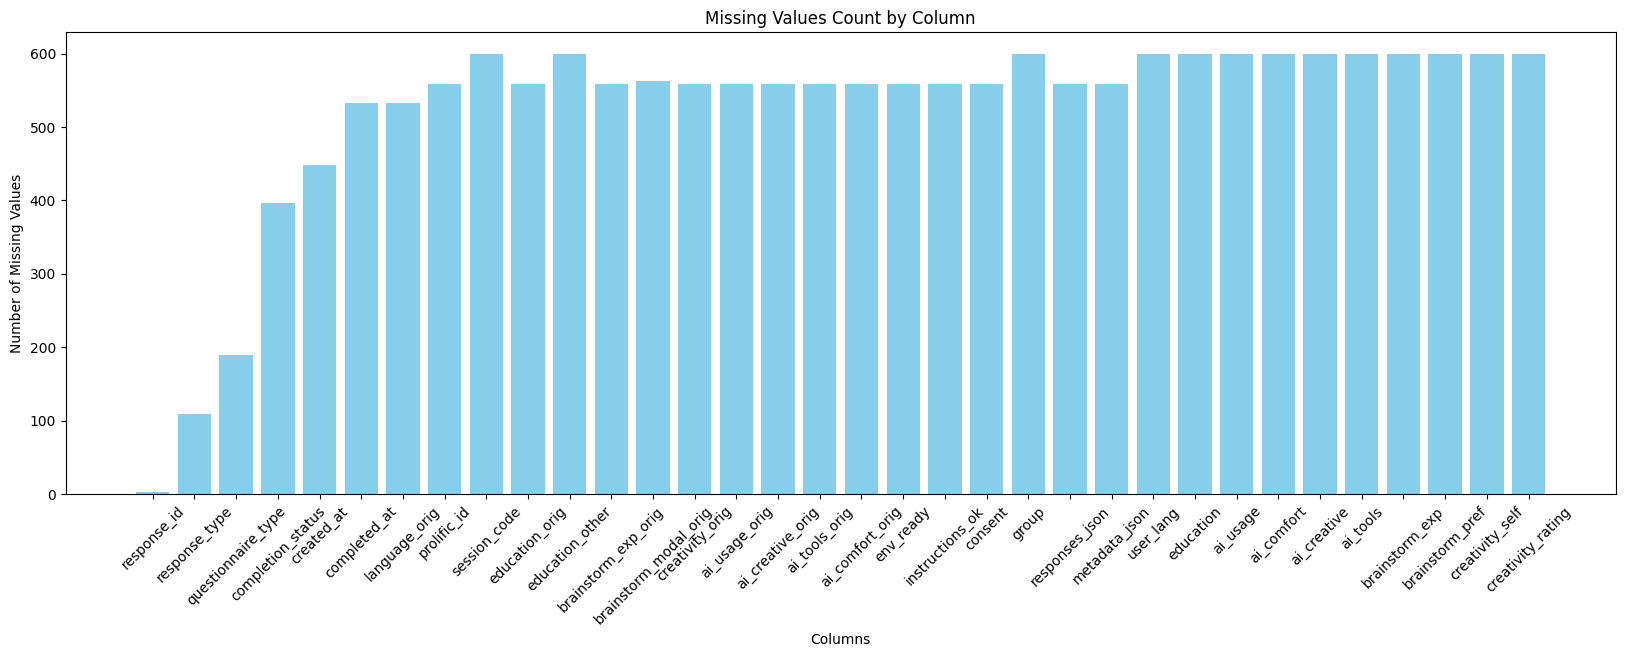

In [12]:
plt.figure(figsize=(20,6))
plt.bar(nan_tab['column'], nan_tab['n_nan_count'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Missing Values Count by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

In [15]:
(df.isna().sum()/df.shape[0] * 100).reset_index().rename(columns={0: 'percent_missing'}).sort_values(by='percent_missing', ascending=False)

,index,percent_missing
9,session_code,100.000000
33,creativity_self,100.000000
38,creativity_rating,100.000000
27,ai_usage,100.000000
28,ai_comfort,100.000000
29,ai_creative,100.000000
30,ai_tools,100.000000
22,group,100.000000
25,user_lang,100.000000
11,education_other,100.000000


In [17]:
missing_values_columns = df.columns[df.isna().sum() / df.shape[0] > 0.5]
for col in missing_values_columns:
    print(f"{col}: {df[col].nunique()} unique values with {df[col].isna().sum()} missing values")

completion_status: 62 unique values with 397 missing values
created_at: 131 unique values with 448 missing values
completed_at: 45 unique values with 533 missing values
language_orig: 28 unique values with 533 missing values
prolific_id: 40 unique values with 559 missing values
session_code: 0 unique values with 599 missing values
education_orig: 4 unique values with 559 missing values
education_other: 0 unique values with 599 missing values
brainstorm_exp_orig: 3 unique values with 559 missing values
brainstorm_modal_orig: 4 unique values with 562 missing values
creativity_orig: 4 unique values with 559 missing values
ai_usage_orig: 2 unique values with 559 missing values
ai_creative_orig: 1 unique values with 559 missing values
ai_tools_orig: 40 unique values with 559 missing values
ai_comfort_orig: 5 unique values with 559 missing values
env_ready: 1 unique values with 559 missing values
instructions_ok: 1 unique values with 559 missing values
consent: 1 unique values with 559 missi